1. Business Understanding
2. Data Mining
3. Data Cleaning
4. Data Exploration
5. Feature Enineering
6. Predictive Modelling
7. Data Visualisation

# Kings County House Prices
An analysis by Vivika Wilde (wilde.vivika@gmail.com).




# Objective

Determine the price drivers on house to find underpriced objects as investment oportunities.


# Set up

In [1]:
%reset -fs
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import datetime
from scipy import stats
import collections

%matplotlib inline
#%matplotlib notebook

data = pd.read_csv(
    '/Users/vivika/nf-may-20/hh-2020-ds1-Project-EDA/King_County_House_prices_dataset.csv'
)

# Variable Names and Descriptions
from project description

* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

# Data Types & Missings

In [2]:
kc = data.copy()
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [3]:
kc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
kc.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,...,7,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


## Missing Data

In [5]:
missing = pd.DataFrame(kc.isnull().sum(), columns=['Number'])
missing['Percentage'] = round(missing.Number / kc.shape[0] * 100, 1)
missing[missing.Number != 0]

,Number,Percentage
waterfront,2376,11.0
view,63,0.3
yr_renovated,3842,17.8


Of the 21 variables two show incomplete data:
* waterfront is missng 11% of the values
* view is missing 0.3% of the values
* yr_renovated is missing 17.8% of the values

For waterfront, it can be assumed that whenever there is no entry the house will not be at the waterfront. Therefore missing data will be replaced with 0. 
Likewise for we assume no renovation was done whenever there is no valid entry. 
For view the mode is considered whenever data is missing.

In [6]:
kc.waterfront.fillna(0.0, inplace=True)
kc.yr_renovated.fillna(0.0, inplace=True)
kc.view.fillna(kc.view.mode(), inplace=True)

## Building Year and Renovation

The modernisation year and therefore an implied standard can be deducted from building year and the year it was renovated.

In [7]:
# years since last modernisation
kc['modernised'] = datetime.datetime.now().year - kc[[
    'yr_built', 'yr_renovated'
]].max(axis=1)
kc = kc.drop(['yr_built', 'yr_renovated'], axis=1)

## Living space
Because we have the basement size, the size of the house exclunding the basement and the size of the total living area, one of these variables is redundant. The basement size date is corrected using the other two variables and the total living area is removed from the data set.

In [8]:
kc['sqft_basement'] = kc['sqft_living'] - kc['sqft_above']

In [9]:
kc = kc.drop(['id', 'date', 'sqft_living'], axis=1)

## Outliers
Data showing larger irregualities than 10 standard deviations is excluded from the data set to avoid distorted outcomes.

In [10]:
outlier_indicies = list(kc[stats.zscore(kc) > 10].index)
kc.drop(outlier_indicies, inplace=True)

/Users/vivika/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


## Categorial Data

In [11]:
cat = kc.filter(['view', 'waterfront', 'condition', 'grade', 'zipcode'],
                axis=1).astype("category")

## Continuous Data

In [12]:
cont = kc.drop(cat, axis=1)
cont = cont.apply(pd.to_numeric)

### Correlations

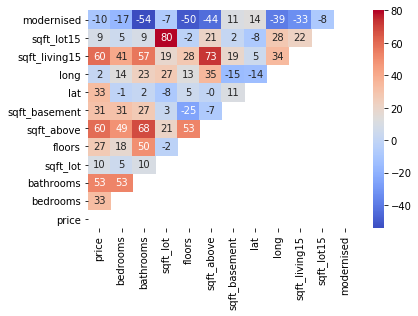

In [13]:
mask = np.triu(cont.corr())
ax = sns.heatmap(round(cont.corr()*100,0)
                 ,annot=True
                 ,mask=mask
                 ,cmap='coolwarm')
ax.set_ylim((0,12))
plt.savefig('figures/correlogram.png')

### Basic Statistics

In [14]:
cont.describe().round()

,price,bedrooms,bathrooms,sqft_lot,floors,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,modernised
count,21391.0,21391.0,21391.0,21391.0,21391.0,21391.0,21391.0,21391.0,21391.0,21391.0,21391.0,21391.0
mean,530601.0,3.0,2.0,13810.0,1.0,1780.0,289.0,48.0,-122.0,1981.0,12031.0,47.0
std,331780.0,1.0,1.0,29381.0,1.0,815.0,437.0,0.0,0.0,681.0,22360.0,29.0
min,78000.0,1.0,0.0,520.0,1.0,370.0,0.0,47.0,-123.0,399.0,651.0,5.0
25%,320000.0,3.0,2.0,5027.0,1.0,1190.0,0.0,47.0,-122.0,1480.0,5100.0,21.0
50%,450000.0,3.0,2.0,7575.0,2.0,1560.0,0.0,48.0,-122.0,1830.0,7600.0,43.0
75%,639000.0,4.0,2.0,10521.0,2.0,2200.0,560.0,48.0,-122.0,2350.0,10004.0,66.0
max,4210000.0,11.0,8.0,426450.0,4.0,9410.0,4130.0,48.0,-121.0,6210.0,275299.0,120.0


### Histograms

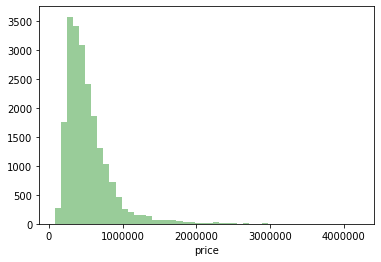

In [15]:
sns.distplot(cont['price'], kde=False, color="g");

### Boxplots

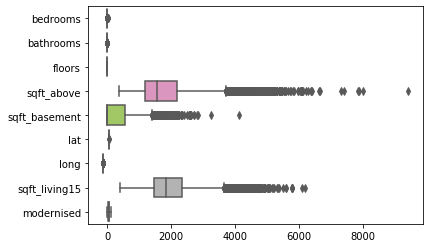

In [16]:
ax = sns.boxplot(data=cont.drop(['price', 'sqft_lot', 'sqft_lot15'], axis=1), orient="h", palette="Set2")

# Features
## Dummies
In order to be able to process the categoria data dummies are created.

In [17]:
dummies = pd.DataFrame()
i_dummies = pd.DataFrame()

for i in cat:
    i_dummies = pd.get_dummies(cat[i], prefix=i, drop_first=True)
    dummies = pd.concat([dummies, i_dummies], axis=1)

kc_dum = pd.concat([cont, dummies], axis=1)


Where there is an excessive amount of variables it will be difficult to view them seperately. Therefore arrays are defined.

In [18]:
cat.nunique()

view           5
waterfront     1
condition      5
grade         11
zipcode       70
dtype: int64

In [19]:
zipcodes = kc_dum.filter(regex='^zipcode', axis=1)
grades = kc_dum.filter(regex='^grade', axis=1)

## Explanatory Variables

In [20]:
X = list(kc_dum)
X.remove('price')
X = [x for x in X if not x.startswith('zipcode')]
X = [x for x in X if not x.startswith('grade')]

rs = []
adj_rs = []

for i in X:
    X1 = kc_dum[i]
    X1 = sm.add_constant(X1)
    y1 = kc_dum.price
    rs.append(sm.OLS(y1, X1).fit().rsquared.round(2))
    adj_rs.append(sm.OLS(y1, X1).fit().rsquared_adj.round(2))

X1 = zipcodes
X1 = sm.add_constant(X1)
y1 = kc_dum.price
rs.append(sm.OLS(y1, X1).fit().rsquared.round(2))
adj_rs.append(sm.OLS(y1, X1).fit().rsquared_adj.round(2))
X.append('zipcodes')

X1 = grades
X1 = sm.add_constant(X1)
y1 = kc_dum.price
rs.append(sm.OLS(y1, X1).fit().rsquared.round(2))
adj_rs.append(sm.OLS(y1, X1).fit().rsquared_adj.round(2))
X.append('grades')

rs_df = pd.DataFrame()
rs_df['explanatory_variable'] = X
rs_df['r_squared'] = rs
rs_df['adjusted_r_squared'] = adj_rs
rs_df = rs_df.sort_values('r_squared', ascending=False)
rs_df

/Users/vivika/opt/anaconda3/envs/nf/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,explanatory_variable,r_squared,adjusted_r_squared
20,grades,0.52,0.52
19,zipcodes,0.46,0.46
4,sqft_above,0.36,0.36
8,sqft_living15,0.36,0.36
1,bathrooms,0.28,0.28
6,lat,0.11,0.11
0,bedrooms,0.11,0.11
5,sqft_basement,0.09,0.09
3,floors,0.07,0.07
13,view_3.0,0.04,0.04


# Model Creation

In [21]:
X1 = kc_dum.copy()
X1.drop('price', axis=1, inplace=True)
X1 = sm.add_constant(X1)
y1 = kc_dum.price
sm.OLS(y1, X1).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     1112.
Date:                Tue, 09 Jun 2020   Prob (F-statistic):               0.00
Time:                        20:11:49   Log-Likelihood:            -2.8290e+05
No. Observations:               21391   AIC:                         5.660e+05
Df Residuals:                   21292   BIC:                         5.668e+05
Df Model:                          98                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.196e+07   5.19e+06     -6.152      0.000   -4.21e+07   -2.18e+07
bedrooms      -8153.7759   1386.917     -5.879      0.000   -1.09e+04   -5435.315
bathrooms      2.303e+04   2239.644     10.281      0.000    1.86e+04    2.74e+04
sqft_lot          0.3648      0.053      6.940      0.000       0.262       0.468
floors        -3.022e+04   2682.015    -11.267      0.000   -3.55e+04    -2.5e+04
sqft_above      148.7172      2.692     55.246      0.000     143.441     153.994
sqft_basement    96.7647      3.053     31.693      0.000      90.780     102.749
lat            1.587e+05   5.37e+04      2.958      0.003    5.35e+04    2.64e+05
long              -2e+05   3.86e+04     -5.187      0.000   -2.76e+05   -1.24e+05
sqft_living15    23.2125      2.478      9.366      0.000      18.355      28.070
sqft_lot15       -0.1827      0.071     -2.591      0.010      -0.321      -0.045
modernised      108.7077     53.414      2.035      0.042       4.013     213.403
view_1.0       9.332e+04   7672.470     12.163      0.000    7.83e+04    1.08e+05
view_2.0        7.41e+04   4708.615     15.738      0.000    6.49e+04    8.33e+04
view_3.0       1.644e+05   6514.370     25.239      0.000    1.52e+05    1.77e+05
view_4.0        3.08e+05   1.01e+04     30.385      0.000    2.88e+05    3.28e+05
condition_2     6.95e+04   2.76e+04      2.516      0.012    1.54e+04    1.24e+05
condition_3    8.756e+04   2.57e+04      3.405      0.001    3.72e+04    1.38e+05
condition_4    1.124e+05   2.57e+04      4.367      0.000    6.19e+04    1.63e+05
condition_5    1.595e+05   2.59e+04      6.164      0.000    1.09e+05     2.1e+05
grade_4       -1.178e+05   1.37e+05     -0.858      0.391   -3.87e+05    1.51e+05
grade_5       -1.423e+05   1.35e+05     -1.053      0.292   -4.07e+05    1.22e+05
grade_6       -1.544e+05   1.35e+05     -1.145      0.252   -4.19e+05     1.1e+05
grade_7       -1.493e+05   1.35e+05     -1.107      0.268   -4.14e+05    1.15e+05
grade_8       -1.234e+05   1.35e+05     -0.915      0.360   -3.88e+05    1.41e+05
grade_9       -4.373e+04   1.35e+05     -0.324      0.746   -3.08e+05    2.21e+05
grade_10       7.458e+04   1.35e+05      0.552      0.581    -1.9e+05    3.39e+05
grade_11       2.614e+05   1.35e+05      1.933      0.053   -3617.387    5.26e+05
grade_12       5.805e+05   1.36e+05      4.267      0.000    3.14e+05    8.47e+05
grade_13        1.24e+06   1.42e+05      8.738      0.000    9.62e+05    1.52e+06
zipcode_98002  2.054e+04   1.21e+04      1.695      0.090   -3216.968    4.43e+04
zipcode_98003 -1.295e+04   1.08e+04     -1.196      0.232   -3.42e+04    8278.818
zipcode_98004  7.205e+05   1.98e+04     36.297      0.000    6.82e+05    7.59e+05
zipcode_98005  2.868e+05   2.12e+04     13.536      0.000    2.45e+05    3.28e+05
zipcode_98006  2.462e+05   1.74e+04     14.182   

In [27]:
X2 = pd.concat([kc_dum.copy(), zipcodes, grades], axis=1)
X2.drop('price', axis=1, inplace=True)
X2 = sm.add_constant(X2)
y2 = kc_dum.price
selected_features = list(X2)
selected_features=selected_features[1:]

In [28]:
pmax = 1
while (len(selected_features)>0):
    p = []
    X2 = kc_dum[selected_features]
    X2 = sm.add_constant(X2)
    model = sm.OLS(y2,X2).fit()
    p = pd.Series(model.pvalues.values[1:],index = selected_features)
    pmax = max(p)
    p_max_feature = p.idxmax()
    if(pmax>0.05):
        selected_features.remove(p_max_feature)
    else:
        break
print("the selected feature are :", selected_features)

X2 = kc_dum[selected_features[1:]]
sm.OLS(y2, X2).fit().summary()

the selected feature are : ['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'modernised', 'view_1.0', 'view_2.0', 'view_3.0', 'view_4.0', 'condition_2', 'condition_3', 'condition_4', 'condition_5', 'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_10', 'grade_11', 'grade_12', 'grade_13', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007', 'zipcode_98008', 'zipcode_98010', 'zipcode_98014', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024', 'zipcode_98027', 'zipcode_98029', 'zipcode_98033', 'zipcode_98034', 'zipcode_98038', 'zipcode_98039', 'zipcode_98040', 'zipcode_98045', 'zipcode_98052', 'zipcode_98053', 'zipcode_98056', 'zipcode_98059', 'zipcode_98065', 'zipcode_98070', 'zipcode_98072', 'zipcode_98074', 'zipcode_98075', 'zipcode_98102', 'zipcode_98103', 'zipcode_98105', 'zipcode_98106', 'zipcode_98107', 'zipcode_98108', 'zipcode_98109', 'zipcode_98112', 'zipcode_98115', 'zipcode_98

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.954
Model:                            OLS   Adj. R-squared (uncentered):              0.953
Method:                 Least Squares   F-statistic:                              5691.
Date:                Tue, 09 Jun 2020   Prob (F-statistic):                        0.00
Time:                        20:16:31   Log-Likelihood:                     -2.8301e+05
No. Observations:               21391   AIC:                                  5.662e+05
Df Residuals:                   21314   BIC:                                  5.668e+05
Df Model:                          77                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bathrooms      2.059e+04   2206.376      9.330      0.000    1.63e+04    2.49e+04
sqft_lot          0.3424      0.053      6.502      0.000       0.239       0.446
floors        -2.979e+04   2686.603    -11.090      0.000   -3.51e+04   -2.45e+04
sqft_above      142.3715      2.533     56.216      0.000     137.407     147.336
sqft_basement    92.9704      2.912     31.925      0.000      87.262      98.678
lat            2.847e+05   1.06e+04     26.926      0.000    2.64e+05    3.05e+05
long           1.105e+05   4112.921     26.863      0.000    1.02e+05    1.19e+05
sqft_living15    21.7059      2.465      8.806      0.000      16.875      26.537
sqft_lot15       -0.2377      0.070     -3.376      0.001      -0.376      -0.100
modernised      153.5372     52.554      2.922      0.003      50.528     256.546
view_1.0       9.744e+04   7683.082     12.683      0.000    8.24e+04    1.13e+05
view_2.0       7.655e+04   4708.027     16.260      0.000    6.73e+04    8.58e+04
view_3.0       1.688e+05   6514.560     25.904      0.000    1.56e+05    1.82e+05
view_4.0       3.131e+05   1.02e+04     30.805      0.000    2.93e+05    3.33e+05
condition_2    6.071e+04   2.77e+04      2.191      0.028    6396.944    1.15e+05
condition_3    7.913e+04   2.58e+04      3.069      0.002    2.86e+04     1.3e+05
condition_4    1.022e+05   2.58e+04      3.963      0.000    5.17e+04    1.53e+05
condition_5    1.494e+05   2.59e+04      5.760      0.000    9.86e+04       2e+05
grade_4       -3.834e+04   1.34e+04     -2.871      0.004   -6.45e+04   -1.22e+04
grade_5       -5.264e+04   5179.492    -10.163      0.000   -6.28e+04   -4.25e+04
grade_6       -5.707e+04   2843.626    -20.070      0.000   -6.26e+04   -5.15e+04
grade_7       -5.481e+04   2072.018    -26.451      0.000   -5.89e+04   -5.07e+04
grade_8       -4.106e+04   1770.744    -23.187      0.000   -4.45e+04   -3.76e+04
grade_10       6.114e+04   2534.404     24.126      0.000    5.62e+04    6.61e+04
grade_11       1.569e+05   4016.221     39.060      0.000    1.49e+05    1.65e+05
grade_12       3.186e+05   8266.635     38.543      0.000    3.02e+05    3.35e+05
grade_13        6.53e+05   2.17e+04     30.047      0.000     6.1e+05    6.96e+05
zipcode_98004  3.353e+05   4064.548     82.486      0.000    3.27e+05    3.43e+05
zipcode_98005  1.129e+05   5409.652     20.872      0.000    1.02e+05    1.24e+05
zipcode_98006  9.268e+04   3349.577     27.668      0.000    8.61e+04    9.92e+04
zipcode_98007  8.111e+04   5845.271     13.876      0.000    6.97e+04    9.26e+04
zipcode_98008  7.482e+04   4310.215     17.358      0.000    6.64e+04    8.33e+04
zipcode_98010  1.998e+04   6910.961      2.891      0.004    6430.326    3.35e+04
zipcode_98014 -1.841e+04   6662.

In [ ]:
X3 = kc_dum[[
    'sqft_living15', 'sqft_above', 'bathrooms', 'bedrooms', 'sqft_basement'
]]
X3 = pd.concat([X3, zipcodes], axis=1)
X3 = sm.add_constant(X3)
y3 = kc_dum.price
model = sm.OLS(y3, X3).fit()
model.summary()

In [ ]:
X3['valued_at'] = model.predict(X3).round(2)
result = data.join(X3['valued_at'])
result['valuation_deviation_abs'] = (result['valued_at'] - result['price']).round(2)
result['valuation_deviation_pct'] = (result['valuation_deviation_abs']/result['price']*100).round(2)
result.sort_values(by = 'valuation_deviation_pct', ascending=False).head(10)